In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
upload = files.upload()
wvs7 = pd.read_csv('/content/wvs7.csv')

Saving wvs7.csv to wvs7.csv


In [ ]:
wvs7.head()

,B_COUNTRY_ALPHA,Q13,Q71,Q107,Q108,Q286
0,AND,2,1,8,2,3
1,AND,2,4,2,2,1
2,AND,2,3,5,5,2
3,AND,2,3,8,5,2
4,AND,2,2,7,7,1


In [ ]:
wvs7.loc[(wvs7['Q71'] < 1) | (wvs7['Q71'] > 4), 'Q71'] = pd.NA
wvs7.loc[(wvs7['Q13'] < 1) | (wvs7['Q13'] > 2), 'Q13'] = pd.NA
wvs7.loc[(wvs7['Q286'] < 1) | (wvs7['Q286'] > 4), 'Q286'] = pd.NA
wvs7.loc[(wvs7['Q107'] < 1) | (wvs7['Q107'] > 10), 'Q107'] = pd.NA
wvs7.loc[(wvs7['Q108'] < 1) | (wvs7['Q108'] > 10), 'Q108'] = pd.NA

In [ ]:
average_df = wvs7.groupby('B_COUNTRY_ALPHA').mean()

In [ ]:
import geopandas as gpd

# Assuming 'average_df' and 'world' are already defined
# Reset index of 'average_df' if 'B_COUNTRY_ALPHA' is the index
if average_df.index.name == 'B_COUNTRY_ALPHA':
    average_df = average_df.reset_index()

# Load the world GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge 'average_df' with 'world' using an outer join
merged_df = world.merge(average_df, how='left', left_on='iso_a3', right_on='B_COUNTRY_ALPHA')

# For rows in 'world' not in 'merged_df', missing values will be filled with NaN


<ipython-input-29-8e5154022bf2>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
# Assuming the column containing the values you want to compare is named 'Q13'
# Assuming the ISO 3166-1 alpha-3 country code for Russia is 'RUS'
# Assuming the ISO 3166-1 alpha-3 country code for the United States is 'USA'

# Find the row corresponding to Russia
russia_row = merged_df[merged_df['iso_a3'] == 'IRN']

# Find the row corresponding to the United States
usa_row = merged_df[merged_df['iso_a3'] == 'USA']

# Extract the value of column 13 for Russia and the United States
russia_q13_value = russia_row['Q286'].values[0]
usa_q13_value = usa_row['Q286'].values[0]

# Compare the values
if russia_q13_value > usa_q13_value:
    print("The value of column 13 is greater for Russia.")
elif russia_q13_value < usa_q13_value:
    print("The value of column 13 is greater for the United States.")
else:
    print("The value of column 13 is equal for Russia and the United States.")


The value of column 13 is greater for Russia.


In [ ]:
merged_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,B_COUNTRY_ALPHA,Q13,Q71,Q107,Q108,Q286
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,1.705575,2.586859,4.913390,5.527875,1.81558
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,1.732253,2.923614,3.683249,5.570431,1.85123


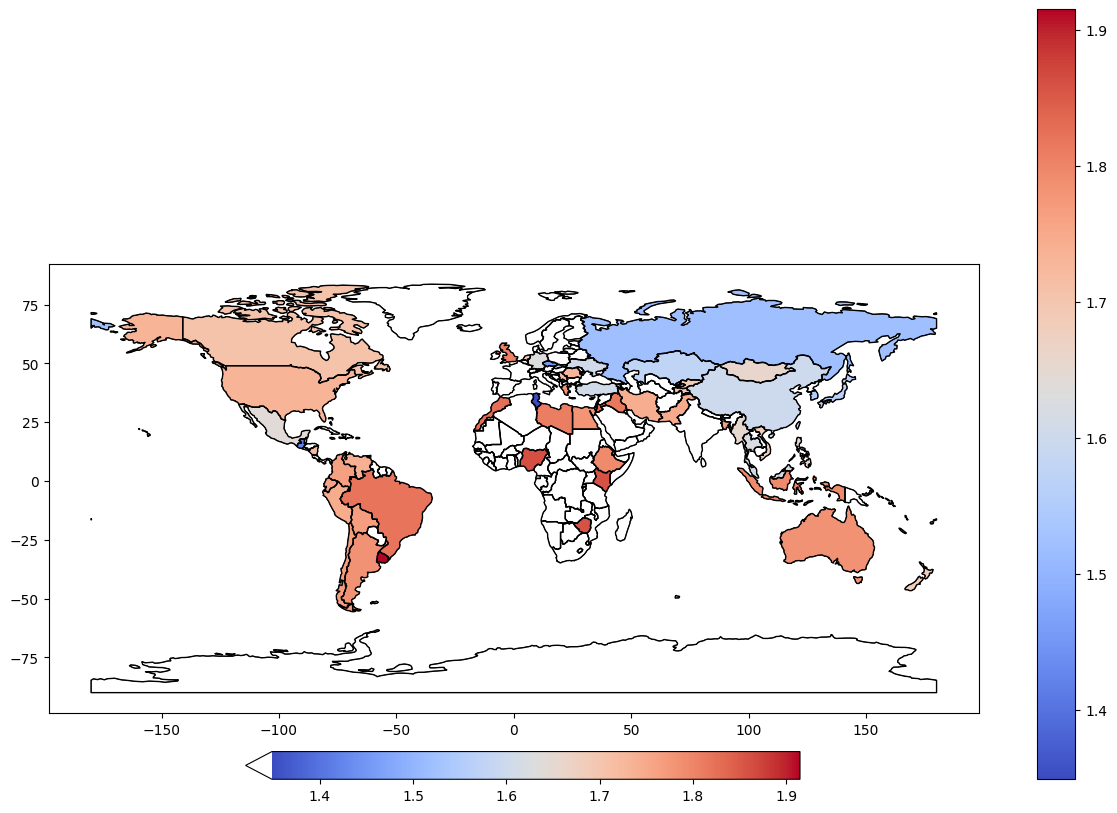

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the borders of all countries first
merged_df.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Define a custom colormap
cmap = plt.cm.coolwarm  # You can choose any colormap
cmap.set_under('white')  # Set color for values under the threshold to white

# Define the normalization for color mapping, including the range and setting the 'extend' to include -10
norm = colors.Normalize(vmin=merged_df['Q13'].min(), vmax=merged_df['Q13'].max())
norm.clip = False  # Turn off clipping so values outside the range can be mapped to 'under' and 'over' colors

# Overlay the 'Q13' column values
merged_df.plot(column='Q13', ax=ax, cmap=cmap, linewidth=0.5, edgecolor='black',
               legend=True, norm=norm, missing_kwds={'color': 'white'})

# Add a legend
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar.set_array([])
fig.colorbar(cbar, ax=ax, orientation='horizontal', fraction=0.036, pad=0.05, extend='min')

plt.show()


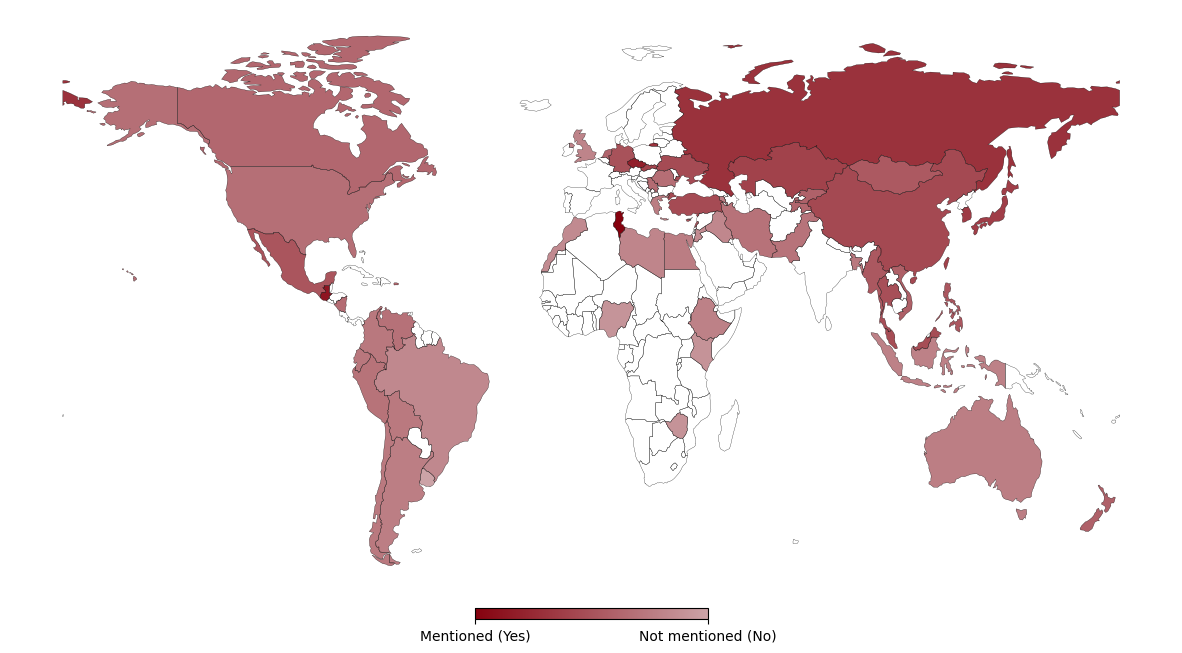

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors

# Assuming 'filtered_data' is your GeoDataFrame with 'GRL' and 'ATA' filtered out

# Define the color limits
light_color = '#85010e'  # Light color
dark_color = '#cca3a7'  # Dark color

# Create a custom colormap from light color to dark color
cmap = mcolors.LinearSegmentedColormap.from_list('custom_color', [light_color, dark_color])

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the borders of all countries first
filtered_data.boundary.plot(ax=ax, edgecolor='black', linewidth=0.2)

# Overlay the 'Q13' column values using the custom color colormap
filtered_data.plot(column='Q13', ax=ax, cmap=cmap, linewidth=0.0, edgecolor='black')

# Adjust the title alignment to the center
#ax.set_title('Q13: Is it important for children to be encouraged to learn at home about thrift and saving money?', fontsize=12, loc='left')

# Adjust the aspect ratio of the map
ax.set_aspect(1.3)

# Remove the axis for a cleaner look
ax.set_axis_off()

# Manually add the colorbar to control the ticks more precisely
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=2))
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.2, pad=0.02)
#cbar.set_label('Is it important for children to be encouraged to learn at home about thrift and saving money?')
cbar.set_ticks([1, 2])  # Explicitly set the ticks to 1 and 2
cbar.set_ticklabels(['Mentioned (Yes)', 'Not mentioned (No)'])  # Set tick labels as 'Yes' and 'No'

plt.savefig('Q13.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('Q13.png')

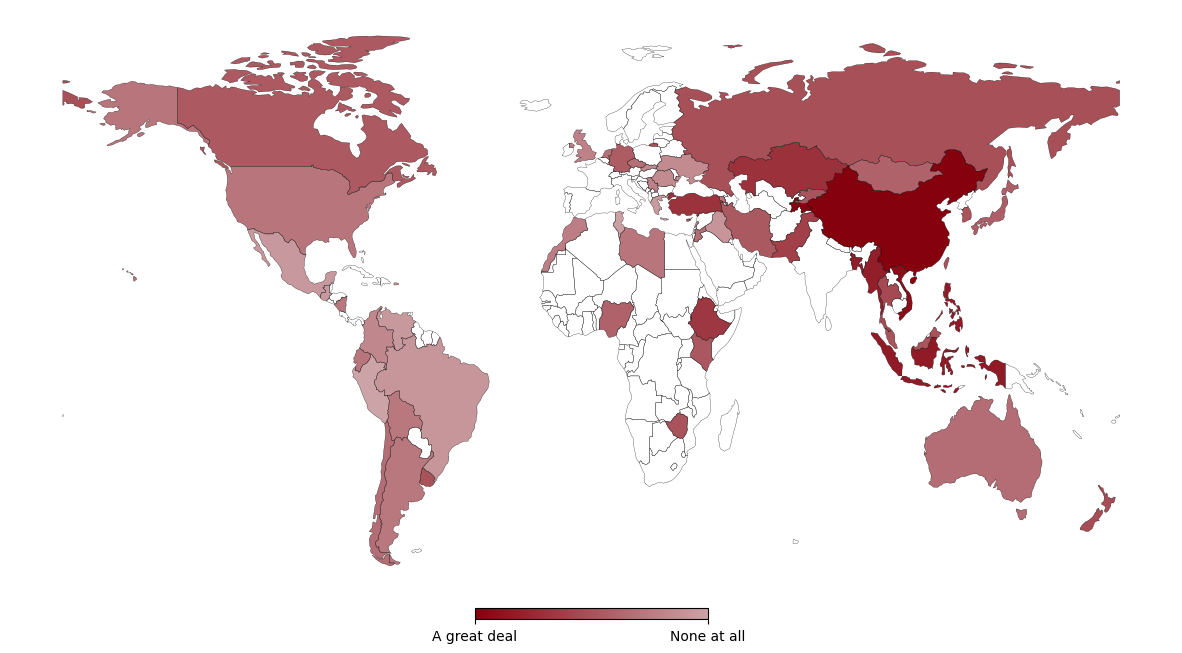

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors

# Assuming 'filtered_data' is your GeoDataFrame with 'GRL' and 'ATA' filtered out

# Define the color limits
color_1 = '#85010e'  # Light color
color_2 = '#cca3a7'  # Dark color

# Create a custom colormap from light color to dark color
cmap = mcolors.LinearSegmentedColormap.from_list('custom_color', [color_1, color_2])

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the borders of all countries first
filtered_data.boundary.plot(ax=ax, edgecolor='black', linewidth=0.2)

# Overlay the 'Q13' column values using the custom color colormap
filtered_data.plot(column='Q71', ax=ax, cmap=cmap, linewidth=0.0, edgecolor='black')

# Adjust the title alignment to the center
#ax.set_title('Q71: How much confidence do you have in the government?', fontsize=12, loc='left')

# Adjust the aspect ratio of the map
ax.set_aspect(1.3)

# Remove the axis for a cleaner look
ax.set_axis_off()

# Manually add the colorbar to control the ticks more precisely
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=4))
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.2, pad=0.02)
#cbar.set_label('Is it important for children to be encouraged to learn at home about thrift and saving money?')
cbar.set_ticks([1, 4])  # Explicitly set the ticks to 1 and 2
cbar.set_ticklabels(['A great deal', 'None at all'])  # Set tick labels as 'Yes' and 'No'

plt.savefig('Q71.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('Q71.png')

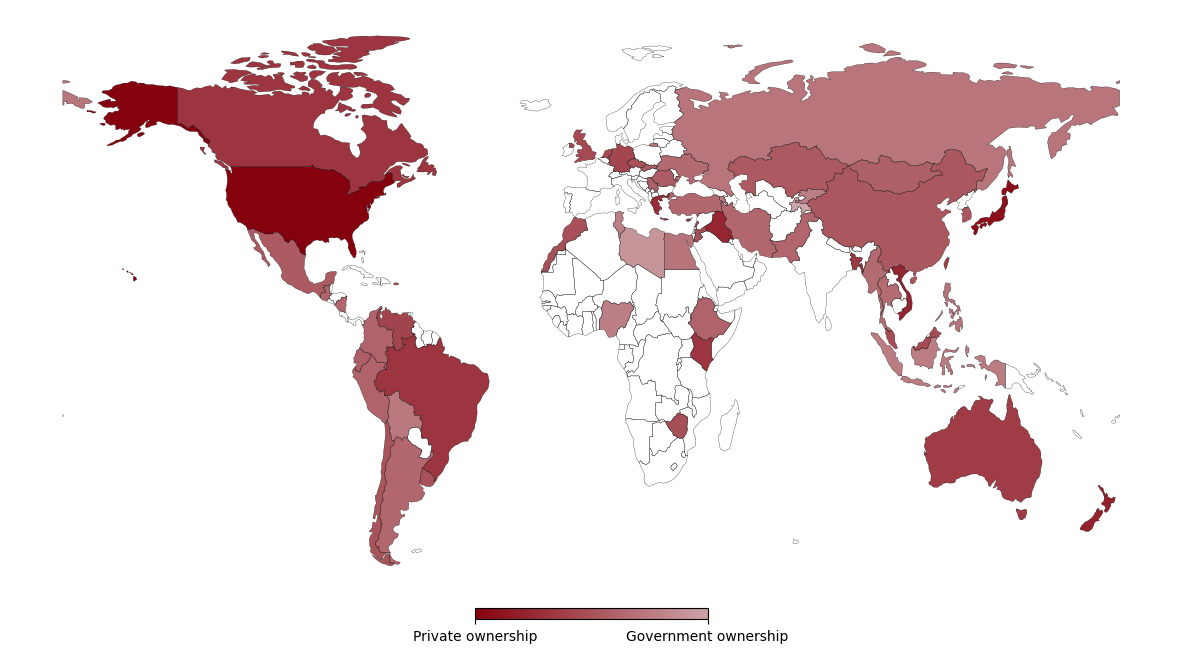

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors

# Assuming 'filtered_data' is your GeoDataFrame with 'GRL' and 'ATA' filtered out

# Define the color limits
color_1 = '#85010e'  # Light color
color_2 = '#cca3a7'  # Dark color

# Create a custom colormap from light color to dark color
cmap = mcolors.LinearSegmentedColormap.from_list('custom_color', [color_1, color_2])

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the borders of all countries first
filtered_data.boundary.plot(ax=ax, edgecolor='black', linewidth=0.2)

# Overlay the 'Q13' column values using the custom color colormap
filtered_data.plot(column='Q107', ax=ax, cmap=cmap, linewidth=0.0, edgecolor='black')

# Adjust the title alignment to the center
#ax.set_title('Q107: Which one should be increased? Government ownership or Private ownership?', fontsize=12, loc='left')

# Adjust the aspect ratio of the map
ax.set_aspect(1.3)

# Remove the axis for a cleaner look
ax.set_axis_off()

# Manually add the colorbar to control the ticks more precisely
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=10))
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.2, pad=0.02)
#cbar.set_label('Is it important for children to be encouraged to learn at home about thrift and saving money?')
cbar.set_ticks([1, 10])  # Explicitly set the ticks to 1 and 2
cbar.set_ticklabels(['Private ownership', 'Government ownership'])  # Set tick labels as 'Yes' and 'No'

plt.savefig('Q107.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('Q107.png')

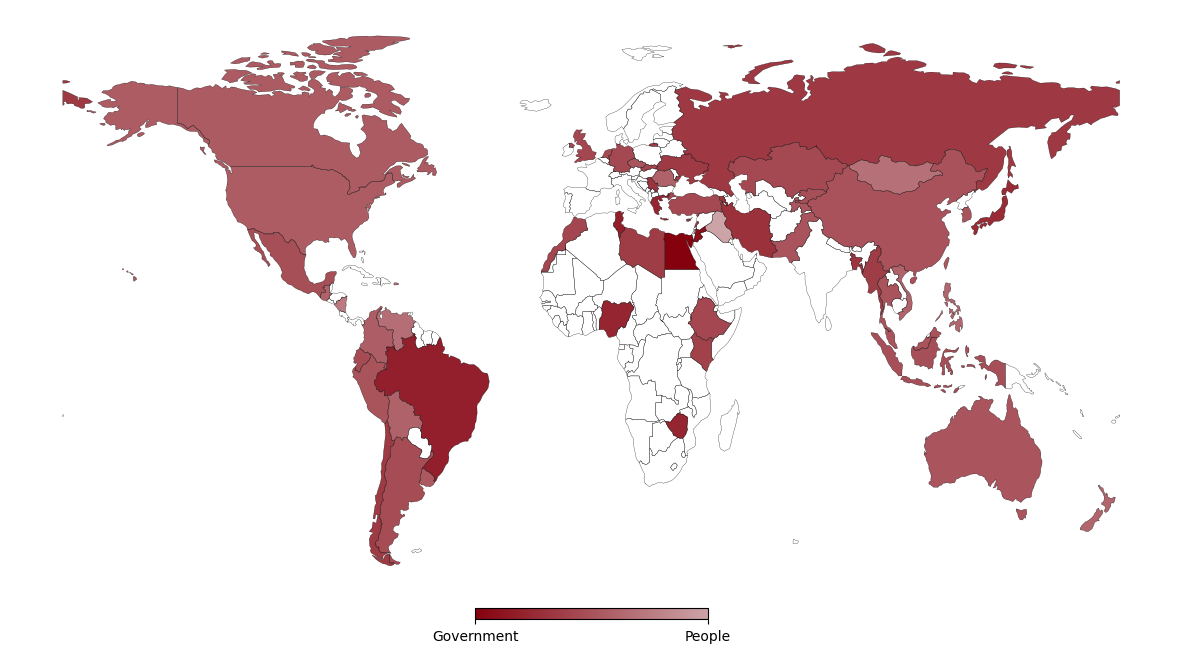

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors

# Assuming 'filtered_data' is your GeoDataFrame with 'GRL' and 'ATA' filtered out

# Define the color limits
color_1 = '#85010e'  # Light color
color_2 = '#cca3a7'  # Dark color

# Create a custom colormap from light color to dark color
cmap = mcolors.LinearSegmentedColormap.from_list('custom_color', [color_1, color_2])

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the borders of all countries first
filtered_data.boundary.plot(ax=ax, edgecolor='black', linewidth=0.2)

# Overlay the 'Q13' column values using the custom color colormap
filtered_data.plot(column='Q108', ax=ax, cmap=cmap, linewidth=0.0, edgecolor='black')

# Adjust the title alignment to the center
#ax.set_title('Q108: Should responsibility for ensuring everyone is provided for be primarily placed on the government or on individuals to provide for themselves?', fontsize=12, loc='left')

# Adjust the aspect ratio of the map
ax.set_aspect(1.3)

# Remove the axis for a cleaner look
ax.set_axis_off()

# Manually add the colorbar to control the ticks more precisely
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=10))
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.2, pad=0.02)
#cbar.set_label('Is it important for children to be encouraged to learn at home about thrift and saving money?')
cbar.set_ticks([1, 10])  # Explicitly set the ticks to 1 and 2
cbar.set_ticklabels(['Government', 'People'])  # Set tick labels as 'Yes' and 'No'

plt.savefig('Q108.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('Q108.png')

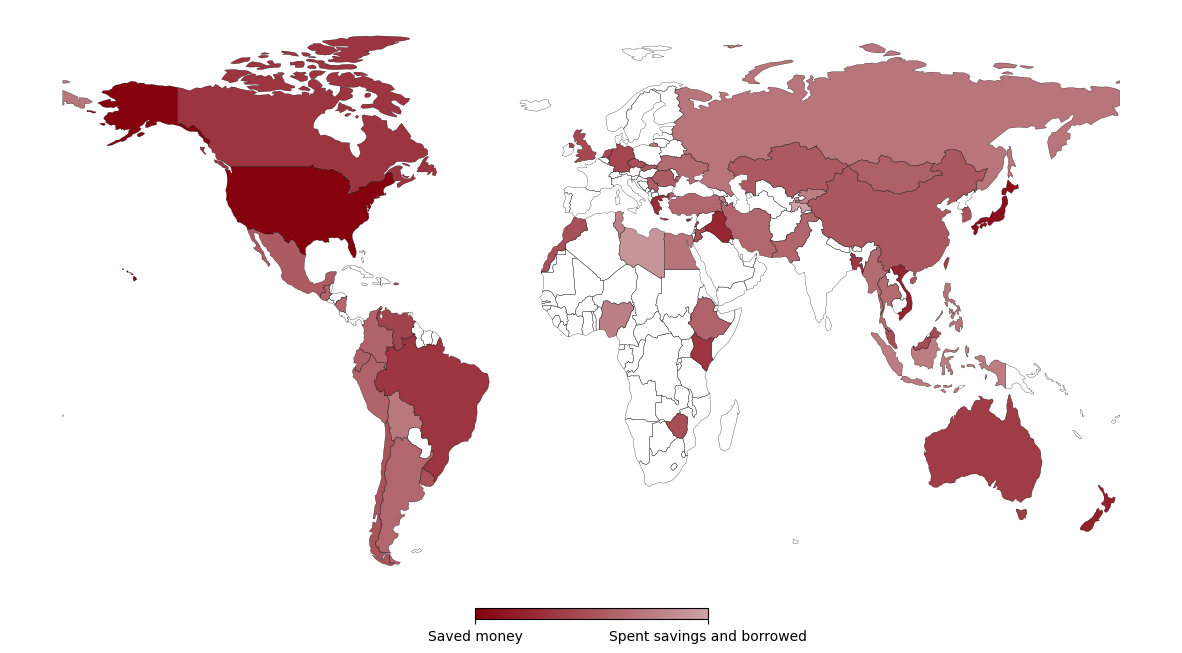

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors

# Assuming 'filtered_data' is your GeoDataFrame with 'GRL' and 'ATA' filtered out

# Define the color limits
color_1 = '#85010e'  # Light color
color_2 = '#cca3a7'  # Dark color

# Create a custom colormap from light color to dark color
cmap = mcolors.LinearSegmentedColormap.from_list('custom_color', [color_1, color_2])

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the borders of all countries first
filtered_data.boundary.plot(ax=ax, edgecolor='black', linewidth=0.2)

# Overlay the 'Q13' column values using the custom color colormap
filtered_data.plot(column='Q107', ax=ax, cmap=cmap, linewidth=0.0, edgecolor='black')

# Adjust the title alignment to the center
#ax.set_title('Q286: During the past year, did your family save more money or spend savings and borrow more money?', fontsize=12, loc='left')

# Adjust the aspect ratio of the map
ax.set_aspect(1.3)

# Remove the axis for a cleaner look
ax.set_axis_off()

# Manually add the colorbar to control the ticks more precisely
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=10))
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.2, pad=0.02)
#cbar.set_label('Is it important for children to be encouraged to learn at home about thrift and saving money?')
cbar.set_ticks([1, 10])  # Explicitly set the ticks to 1 and 2
cbar.set_ticklabels(['Saved money', 'Spent savings and borrowed'])  # Set tick labels as 'Yes' and 'No'

plt.savefig('Q286.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('Q286.png')